In [123]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("StatsPlots")

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [124]:
using Random
using CSV
using Plots
using DataFrames
using Statistics
using LinearAlgebra
using StatsPlots

In [489]:
df = CSV.read("national.csv")

217340×311 DataFrame. Omitted printing of 309 columns
│ Row    │ sitecode │ sitename                                           │
│        │ String   │ String                                             │
├────────┼──────────┼────────────────────────────────────────────────────┤
│ 1      │ XX       │ United States (XX)                                 │
│ 2      │ XX       │ United States (XX)                                 │
│ 3      │ XX       │ United States (XX)                                 │
│ 4      │ XX       │ United States (XX)                                 │
│ 5      │ XX       │ United States (XX)                                 │
│ 6      │ XX       │ United States (XX)                                 │
│ 7      │ XX       │ United States (XX)                                 │
│ 8      │ XX       │ United States (XX)                                 │
│ 9      │ XX       │ United States (XX)                                 │
│ 10     │ XX       │ United States (XX)                                 │
⋮
│ 217330 │ XX       │ United States (XX)                                 │
│ 217331 │ XX       │ United States (XX)                                 │
│ 217332 │ XX       │ United States (XX)                                 │
│ 217333 │ XX       │ United States (XX)                                 │
│ 217334 │ XX       │ United States (XX)                                 │
│ 217335 │ XX       │ United States (XX)                                 │
│ 217336 │ XX       │ United States (XX)                                 │
│ 217337 │ XX       │ United States (XX)                                 │
│ 217338 │ XX       │ United States (XX)                                 │
│ 217339 │ XX       │ United States (XX)                                 │
│ 217340 │ XX       │ United States (XX)                                 │

In [490]:
feature_names = names(df)
for i in 1:size(df, 2)
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(df[!, i])))
end

1	sitecode			String
2	sitename			String
3	sitetype			String
4	sitetypenum			Int64
5	year			Int64
6	survyear			Int64
7	weight			Float64
8	stratum			Int64
9	PSU			Int64
10	record			Float64
11	age			String
12	sex			String
13	grade			String
14	race4			String
15	race7			String
16	stheight			String
17	stweight			String
18	bmi			String
19	bmipct			String
20	qnobese			String
21	qnowt			String
22	q66			String
23	q65			String
24	sexid			String
25	sexid2			String
26	sexpart			String
27	sexpart2			String
28	q8			String
29	q9			String
30	q10			String
31	q11			String
32	q12			String
33	q13			String
34	q14			String
35	q15			String
36	q16			String
37	q17			String
38	q18			String
39	q19			String
40	q20			String
41	q21			String
42	q22			String
43	q23			String
44	q24			String
45	q25			String
46	q26			String
47	q27			String
48	q28			String
49	q29			String
50	q30			String
51	q31			String
52	q32			String
53	q33			String
54	q34			String
55	q35			String
56	q36			String
57	q37			String
58	q38			String
59	q39		

In [491]:
df = select!(df, Not(:sitename))
df = select!(df, Not(:sitetype))
df = select!(df, Not(:sitetypenum))
df = select!(df, Not(:survyear))
df = select!(df, Not(:weight))
df = select!(df, Not(:stratum))
df = select!(df, Not(:PSU))
df = select!(df, Not(:record))

217340×303 DataFrame. Omitted printing of 296 columns
│ Row    │ sitecode │ year  │ age    │ sex    │ grade  │ race4  │ race7  │
│        │ String   │ Int64 │ String │ String │ String │ String │ String │
├────────┼──────────┼───────┼────────┼────────┼────────┼────────┼────────┤
│ 1      │ XX       │ 1991  │ NA     │ NA     │ 1      │ 3      │ 4      │
│ 2      │ XX       │ 1991  │ NA     │ NA     │ NA     │ NA     │ NA     │
│ 3      │ XX       │ 1991  │ 4      │ NA     │ 2      │ 1      │ 6      │
│ 4      │ XX       │ 1991  │ 5      │ NA     │ 2      │ 1      │ 6      │
│ 5      │ XX       │ 1991  │ 6      │ NA     │ NA     │ 4      │ NA     │
│ 6      │ XX       │ 1991  │ NA     │ 2      │ 4      │ 3      │ 4      │
│ 7      │ XX       │ 1991  │ NA     │ 2      │ 4      │ 3      │ 4      │
│ 8      │ XX       │ 1991  │ 1      │ 2      │ NA     │ 4      │ NA     │
│ 9      │ XX       │ 1991  │ 1      │ 2      │ 3      │ 1      │ 6      │
│ 10     │ XX       │ 1991  │ 1      │ 2      │ 2      │ 4      │ NA     │
⋮
│ 217330 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 3      │ 4      │
│ 217331 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217332 │ XX       │ 2019  │ 7      │ 1      │ 3      │ 2      │ 3      │
│ 217333 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217334 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217335 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217336 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217337 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217338 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 217339 │ XX       │ 2019  │ 7      │ 1      │ 3      │ NA     │ NA     │
│ 217340 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 2      │ 3      │

In [492]:
keep = df[:age].!="NA"
r_df = df[keep, :]
keep = r_df[:grade].!="NA"
r_df = r_df[keep, :]
keep = r_df[:sex].!="NA"
r_df = r_df[keep, :]
keep = r_df[:q41].!=" "
r_df = r_df[keep, :]

199642×303 DataFrame. Omitted printing of 296 columns
│ Row    │ sitecode │ year  │ age    │ sex    │ grade  │ race4  │ race7  │
│        │ String   │ Int64 │ String │ String │ String │ String │ String │
├────────┼──────────┼───────┼────────┼────────┼────────┼────────┼────────┤
│ 1      │ XX       │ 1991  │ 1      │ 2      │ 2      │ 4      │ NA     │
│ 2      │ XX       │ 1991  │ 1      │ 2      │ 1      │ 4      │ 2      │
│ 3      │ XX       │ 1991  │ 1      │ 2      │ 2      │ 3      │ 4      │
│ 4      │ XX       │ 1991  │ 1      │ 2      │ 1      │ 4      │ NA     │
│ 5      │ XX       │ 1991  │ 2      │ 2      │ 1      │ 2      │ 3      │
│ 6      │ XX       │ 1991  │ 2      │ 2      │ 1      │ 1      │ 6      │
│ 7      │ XX       │ 1991  │ 2      │ 2      │ 1      │ 2      │ 3      │
│ 8      │ XX       │ 1991  │ 3      │ 2      │ 1      │ 3      │ 4      │
│ 9      │ XX       │ 1991  │ 3      │ 2      │ 1      │ 1      │ 6      │
│ 10     │ XX       │ 1991  │ 3      │ 2      │ 1      │ 2      │ 3      │
⋮
│ 199632 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 3      │ 4      │
│ 199633 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199634 │ XX       │ 2019  │ 7      │ 1      │ 3      │ 2      │ 3      │
│ 199635 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199636 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199637 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199638 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199639 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199640 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 1      │ 6      │
│ 199641 │ XX       │ 2019  │ 7      │ 1      │ 3      │ NA     │ NA     │
│ 199642 │ XX       │ 2019  │ 7      │ 1      │ 4      │ 2      │ 3      │

In [493]:
r_df = r_df[shuffle(1:end), :]
train_proportion = 0.6
val_proportion = 0.2
n = size(r_df, 1)
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))
nval = convert(Int, round(val_proportion*n))

target = r_df[:, :q41]
data = r_df[:, filter(col -> (col != :q41), names(r_df))]

#Now you will split the data to create training and test sets. 

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
val_x = data[ntrain+1:ntrain+nval,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+nval+1:n,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
val_y = target[ntrain+1:ntrain+nval,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+nval+1:n,:]

Size of dataset: 199642


39929×1 Array{String,2}:
 "1"
 "1"
 "3"
 "1"
 "1"
 "1"
 "2"
 "1"
 "1"
 "4"
 "1"
 "1"
 "1"
 ⋮
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "1"
 "2"
 "1"
 "1"
 "1"
 "1"

In [494]:
println(size(train_x))
println(size(train_y))
println(size(test_x))
println(size(test_y))
println(size(val_x))
println(size(val_y))

(119785, 303)
(119785, 1)
(39929, 303)
(39929, 1)
(39928, 303)
(39928, 1)


In [495]:
"This function converts strings to int values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_int(str)
    try
        parse(Int, str)
    catch
       0.0
    end
end

string_to_int

In [496]:
"This function converts strings to floating point values.
Strings that cannot be represented as a number (like NA) are converted to zeros"
function string_to_float(str)
    try
        parse(Float64, str)
    catch
       0.0
    end
end

string_to_float

In [497]:
function ages(df)
    for i = 1:size(df,1)
        if df[i, :age] == "1"
            df[i, :age] = "12"
        elseif df[i, :age] == "2"
            df[i, :age] = "13"
        elseif df[i, :age] == "3"
            df[i, :age] = "14"
        elseif df[i, :age] == "4"
            df[i, :age] = "15"
        elseif df[i, :age] == "5"
            df[i, :age] = "16"
        elseif df[i, :age] == "6"
            df[i, :age] = "17"           
        elseif df[i, :age] == "7"
            df[i, :age] = "18"
        end
    end
    df[:age] = string_to_int.(df[:age])
    return df
end

ages (generic function with 1 method)

In [498]:
train_x1 = ages(train_x)
test_x1 = ages(test_x)
val_x1 = ages(val_x)

39928×303 DataFrame. Omitted printing of 296 columns
│ Row   │ sitecode │ year  │ age   │ sex    │ grade  │ race4  │ race7  │
│       │ String   │ Int64 │ Int64 │ String │ String │ String │ String │
├───────┼──────────┼───────┼───────┼────────┼────────┼────────┼────────┤
│ 1     │ XX       │ 2003  │ 16    │ 2      │ 2      │ 1      │ 6      │
│ 2     │ XX       │ 2007  │ 16    │ 1      │ 2      │ 3      │ 4      │
│ 3     │ XX       │ 2015  │ 15    │ 1      │ 1      │ 1      │ 6      │
│ 4     │ XX       │ 1991  │ 16    │ 1      │ 2      │ 1      │ 6      │
│ 5     │ XX       │ 1993  │ 18    │ 1      │ 3      │ 2      │ 3      │
│ 6     │ XX       │ 2017  │ 17    │ 1      │ 4      │ 1      │ 6      │
│ 7     │ XX       │ 1993  │ 14    │ 1      │ 1      │ 1      │ 6      │
│ 8     │ XX       │ 1997  │ 17    │ 2      │ 2      │ 3      │ 4      │
│ 9     │ XX       │ 2005  │ 15    │ 1      │ 2      │ 1      │ 6      │
│ 10    │ XX       │ 2003  │ 16    │ 2      │ 3      │ 2      │ 3      │
⋮
│ 39918 │ XX       │ 1999  │ 15    │ 2      │ 2      │ 2      │ 3      │
│ 39919 │ XX       │ 2003  │ 16    │ 1      │ 2      │ 3      │ 4      │
│ 39920 │ XX       │ 1999  │ 16    │ 1      │ 2      │ 2      │ 3      │
│ 39921 │ XX       │ 1995  │ 18    │ 1      │ 4      │ 4      │ NA     │
│ 39922 │ XX       │ 2009  │ 16    │ 2      │ 4      │ 4      │ 7      │
│ 39923 │ XX       │ 1999  │ 16    │ 1      │ 2      │ 1      │ 6      │
│ 39924 │ XX       │ 2005  │ 15    │ 1      │ 2      │ 1      │ 6      │
│ 39925 │ XX       │ 1999  │ 18    │ 1      │ 4      │ 2      │ 3      │
│ 39926 │ XX       │ 2001  │ 15    │ 1      │ 1      │ 2      │ 3      │
│ 39927 │ XX       │ 2007  │ 18    │ 1      │ 4      │ 3      │ 4      │
│ 39928 │ XX       │ 1993  │ 17    │ 1      │ 3      │ 1      │ 6      │

In [499]:
function q41(df)
    for i = 1:size(df,1)
        if df[i] == "1"
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "4"
        elseif df[i] == "4"
            df[i] = "7.5"
        elseif df[i] == "5"
            df[i] = "14.5"
        elseif df[i] == "6"
            df[i] = "24.5"           
        elseif df[i] == "7"
            df[i] = "30"
        end
    end
    df = string_to_float.(df)
    return df
end

q41 (generic function with 1 method)

In [500]:
train_y1 = q41(train_y)
test_y1 = q41(test_y)
val_y1 = q41(val_y)

39928×1 Array{Float64,2}:
  0.0
  0.0
  0.0
  7.5
  4.0
  0.0
  4.0
  1.5
 14.5
  4.0
  4.0
  4.0
  0.0
  ⋮
  0.0
  0.0
  1.5
  0.0
  0.0
  0.0
  0.0
  0.0
  1.5
  1.5
  1.5
 14.5

In [883]:
Xtrain = hcat(train_x1[:age], ones(ntrain))
Xval = hcat(val_x1[:age], ones(nval))

39928×2 Array{Float64,2}:
 16.0  1.0
 16.0  1.0
 15.0  1.0
 16.0  1.0
 18.0  1.0
 17.0  1.0
 14.0  1.0
 17.0  1.0
 15.0  1.0
 16.0  1.0
 18.0  1.0
 16.0  1.0
 17.0  1.0
  ⋮    
 16.0  1.0
 15.0  1.0
 16.0  1.0
 16.0  1.0
 18.0  1.0
 16.0  1.0
 16.0  1.0
 15.0  1.0
 18.0  1.0
 15.0  1.0
 18.0  1.0
 17.0  1.0

"""This function just computes the mean squared error."""
function MSE(y, pred)
    tot = sum((y.-pred).^2)
    return tot/size(y,1)
end

"""This completed function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end

"""This completed helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false)
    scatter(x,y, label="data")
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This completed function plots the predicted labels vs the actual labels
(We only plots the first 1000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 10000)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (days)", "True days)", zeromin=true)
end

In [884]:
"""This function just computes the mean squared error."""
function MSE(y, pred)
    tot = sum((y.-pred).^2)
    return tot/size(y,1)
end

MSE

In [885]:
"""This completed function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end

plotDiagonal

In [886]:
"""This completed helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false)
    scatter(x,y, label="data")
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end


plotdata

In [887]:
"""This completed function plots the predicted labels vs the actual labels
(We only plots the first 10000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 1000)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (days)", "True (days)", zeromin=true)
end

plot_pred_true

In [888]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

22.103897113058263

Train MSE	22.353829556917784
Validation MSE 	22.103897113058263


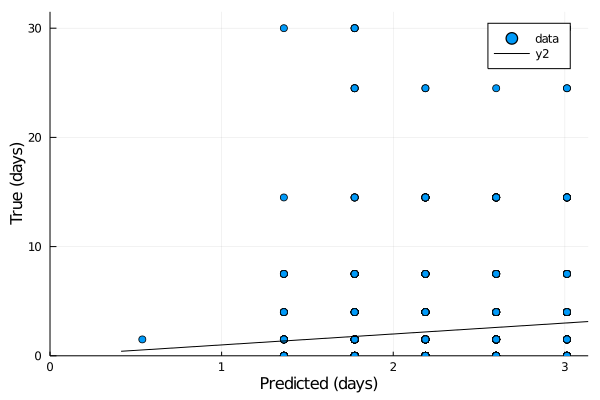

In [889]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [890]:
Xtrain = hcat(train_x1[:year], Xtrain)
Xval = hcat(val_x1[:year], Xval)

39928×3 Array{Float64,2}:
 2003.0  16.0  1.0
 2007.0  16.0  1.0
 2015.0  15.0  1.0
 1991.0  16.0  1.0
 1993.0  18.0  1.0
 2017.0  17.0  1.0
 1993.0  14.0  1.0
 1997.0  17.0  1.0
 2005.0  15.0  1.0
 2003.0  16.0  1.0
 2011.0  18.0  1.0
 1991.0  16.0  1.0
 2005.0  17.0  1.0
    ⋮          
 2001.0  16.0  1.0
 1999.0  15.0  1.0
 2003.0  16.0  1.0
 1999.0  16.0  1.0
 1995.0  18.0  1.0
 2009.0  16.0  1.0
 1999.0  16.0  1.0
 2005.0  15.0  1.0
 1999.0  18.0  1.0
 2001.0  15.0  1.0
 2007.0  18.0  1.0
 1993.0  17.0  1.0

In [891]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

21.893206987760358

Train MSE	22.11946794410637
Validation MSE 	21.893206987760358


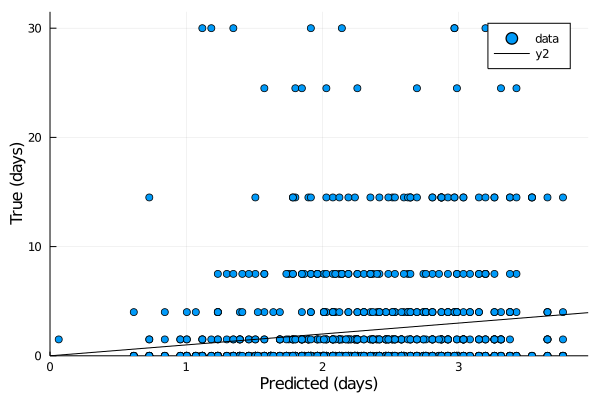

In [892]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [893]:
function onehot(column, cats=unique(column))
    result = zeros(size(column, 1), length(cats))
    for i = 1:length(column)
        for j = 1:length(cats)
            if column[i] == cats[j]
                result[i,j] = 1
            end
        end
    end
    result
end

onehot (generic function with 2 methods)

In [894]:
Xtrain = hcat(onehot(train_x1[:sex]), Xtrain)
Xval = hcat(onehot(val_x1[:sex]), Xval)

39928×5 Array{Float64,2}:
 1.0  0.0  2003.0  16.0  1.0
 0.0  1.0  2007.0  16.0  1.0
 0.0  1.0  2015.0  15.0  1.0
 0.0  1.0  1991.0  16.0  1.0
 0.0  1.0  1993.0  18.0  1.0
 0.0  1.0  2017.0  17.0  1.0
 0.0  1.0  1993.0  14.0  1.0
 1.0  0.0  1997.0  17.0  1.0
 0.0  1.0  2005.0  15.0  1.0
 1.0  0.0  2003.0  16.0  1.0
 0.0  1.0  2011.0  18.0  1.0
 0.0  1.0  1991.0  16.0  1.0
 0.0  1.0  2005.0  17.0  1.0
 ⋮                       
 0.0  1.0  2001.0  16.0  1.0
 1.0  0.0  1999.0  15.0  1.0
 0.0  1.0  2003.0  16.0  1.0
 0.0  1.0  1999.0  16.0  1.0
 0.0  1.0  1995.0  18.0  1.0
 1.0  0.0  2009.0  16.0  1.0
 0.0  1.0  1999.0  16.0  1.0
 0.0  1.0  2005.0  15.0  1.0
 0.0  1.0  1999.0  18.0  1.0
 0.0  1.0  2001.0  15.0  1.0
 0.0  1.0  2007.0  18.0  1.0
 0.0  1.0  1993.0  17.0  1.0

In [895]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

22.377059932991525

Train MSE	21.957013756502562
Validation MSE 	22.377059932991525


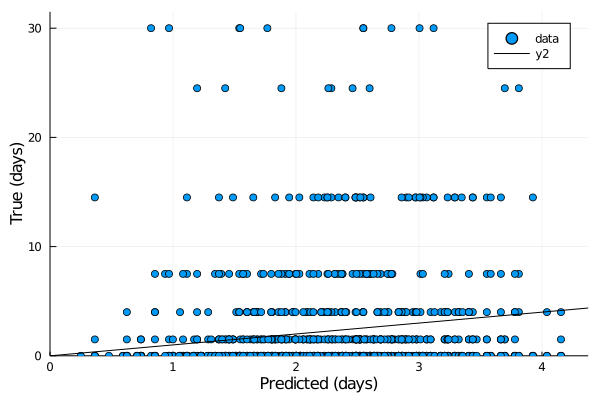

In [896]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [897]:
Xtrain = hcat(onehot(train_x1[:race7], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(onehot(val_x1[:race7], ["1", "2", "3", "4", "5", "6", "7"]), Xval)
println(size(Xtrain))
println(size(Xval))

(119785, 12)
(39928, 12)


In [898]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

22.18578184488295

Train MSE	21.751968894862248
Validation MSE 	22.18578184488295


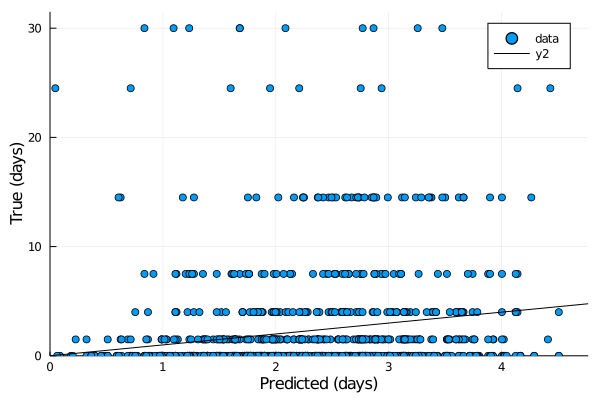

In [899]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [900]:
Xtrain = hcat(onehot(train_x1[:q23], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q23], ["1", "2"]), Xval)

39928×14 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  2007.0  16.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  2005.0  17.0  1.0
 ⋮         

In [901]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

22.17059091599144

Train MSE	21.715715778256754
Validation MSE 	22.17059091599144


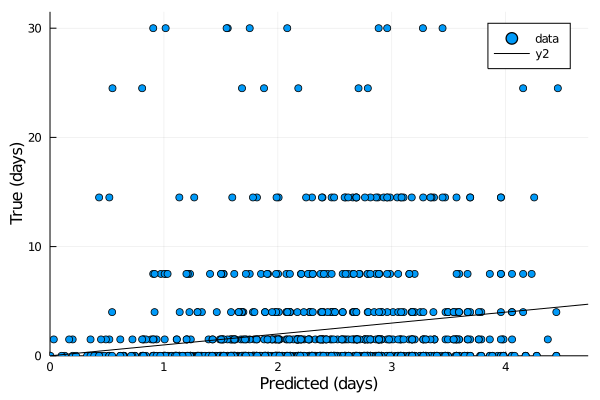

In [902]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [903]:
Xtrain = hcat(onehot(train_x1[:q24], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q24], ["1", "2"]), Xval)

39928×16 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  1.0  2007.0  16.0  1.0
 1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  

In [904]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

22.181472762333517

Train MSE	21.66933488713895
Validation MSE 	22.181472762333517


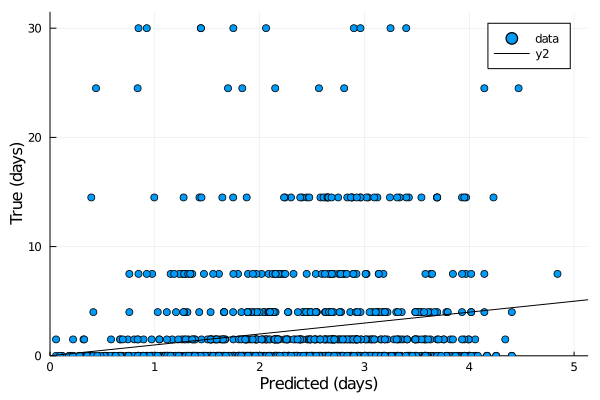

In [905]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [906]:
Xtrain = hcat(onehot(train_x1[:q30], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q30], ["1", "2"]), Xval)

39928×18 Array{Float64,2}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  

In [907]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

20.595544466928274

Train MSE	20.191917545023816
Validation MSE 	20.595544466928274


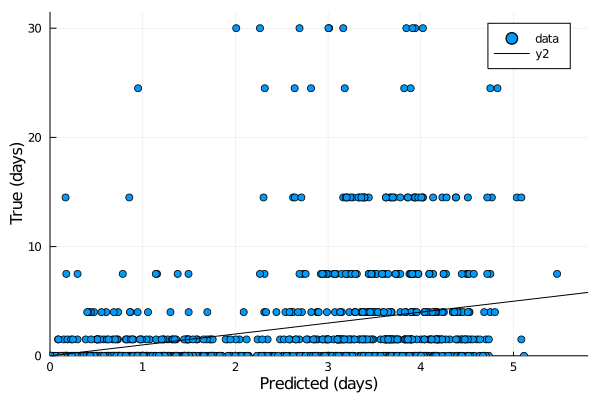

In [908]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [909]:
function q32(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "4"
        elseif df[i] == "4"
            df[i] = "7.5"
        elseif df[i] == "5"
            df[i] = "14.5"
        elseif df[i] == "6"
            df[i] = "24.5"           
        elseif df[i] == "7"
            df[i] = "30"
        end
    end
    df = string_to_float.(df)
    return df
end

q32 (generic function with 1 method)

In [910]:
Xtrain = hcat(q32(train_x1[:q32]), Xtrain)
Xval = hcat(q32(val_x1[:q32]), Xval)

39928×19 Array{Float64,2}:
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
  7.5  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
  1.5  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
  7.5  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  

In [911]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

18.244631533638252

Train MSE	17.79339098950324
Validation MSE 	18.244631533638252


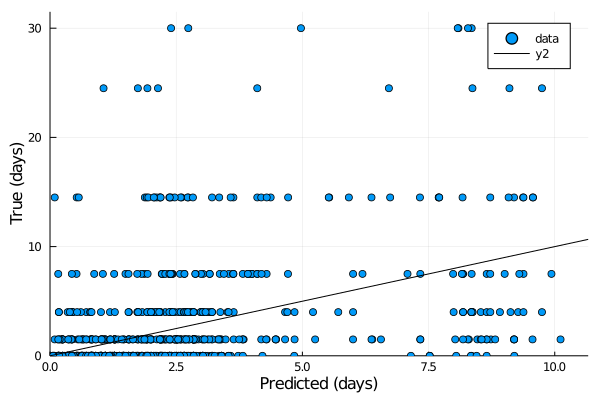

In [912]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [913]:
function q33(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "0.5"
        elseif df[i] == "3"
            df[i] = "1"
        elseif df[i] == "4"
            df[i] = "3.5"
        elseif df[i] == "5"
            df[i] = "8"
        elseif df[i] == "6"
            df[i] = "15.5"           
        elseif df[i] == "7"
            df[i] = "20"
        end
    end
    df = string_to_float.(df)
    return df
end

q33 (generic function with 1 method)

In [914]:
Xtrain = hcat(q33(train_x1[:q33]), Xtrain)
Xval = hcat(q33(val_x1[:q33]), Xval)

39928×20 Array{Float64,2}:
 0.0   0.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0   0.0  0.0  1.0  1.0  0.0  1.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 8.0   7.5  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0   0.0  0.0  1.0  0.0  1.0  0.0  1.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.5   1.5  1.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0   7.5  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0   0.0  1.0  0.0  0.0  1.0  0.0  1.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0   0.0  0.0  1.0  0.0  0.0  0.0  

In [915]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

17.872192715603646

Train MSE	17.34964217856025
Validation MSE 	17.872192715603646


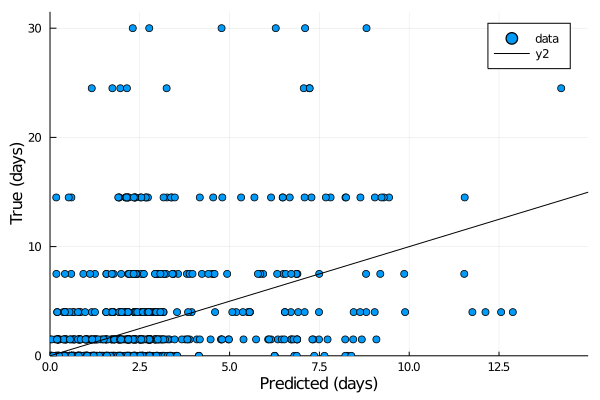

In [916]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [917]:
function q31(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "100"
        elseif df[i] == "2"
            df[i] = "8"
        elseif df[i] == "3"
            df[i] = "9.5"
        elseif df[i] == "4"
            df[i] = "11.5"
        elseif df[i] == "5"
            df[i] = "13.5"
        elseif df[i] == "6"
            df[i] = "15.5"           
        elseif df[i] == "7"
            df[i] = "17"
        end
    end
    df = string_to_float.(df)
    return df
end

q31 (generic function with 1 method)

In [918]:
Xtrain = hcat(q31(train_x1[:q31]), Xtrain)
Xval = hcat(q31(val_x1[:q31]), Xval)

39928×21 Array{Float64,2}:
 100.0  0.0   0.0  0.0  1.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 100.0  0.0   0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 100.0  0.0   0.0  0.0  1.0  1.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 100.0  8.0   7.5  1.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 100.0  0.0   0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 100.0  0.0   0.0  0.0  1.0  0.0  1.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 100.0  0.0   0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 100.0  0.5   1.5  1.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 100.0  0.0   7.5  1.0  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 100.0  0.0   0.0  1.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 100.0  0.0   0.0  1.0  0.0  0.0  1.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 100.0  0.0   0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 100.0  0.0   0.0  0.0  1.0  0.0  0.0     0.0  0.0  1.0  2005.0  17.0  1.

In [919]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

17.871834069320208

Train MSE	17.346038416357768
Validation MSE 	17.871834069320208


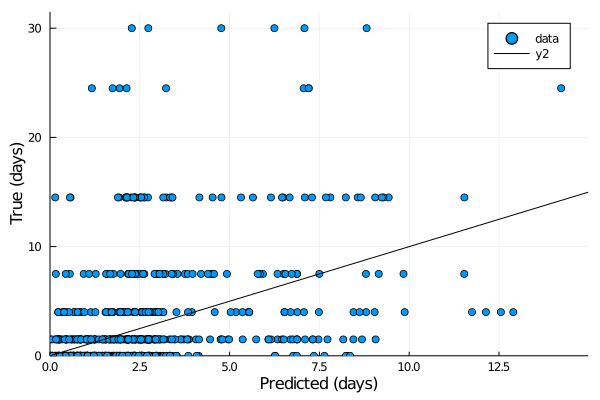

In [920]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [921]:
Xtrain = hcat(onehot(train_x1[:q34], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q34], ["1", "2"]), Xval)

39928×23 Array{Float64,2}:
 0.0  0.0  100.0  0.0   0.0  0.0  1.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  100.0  0.0   0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  1.0  100.0  0.0   0.0  0.0  1.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  100.0  8.0   7.5  1.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  100.0  0.0   0.0  1.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  1.0  100.0  0.0   0.0  0.0  1.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  100.0  0.0   0.0  1.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  100.0  0.5   1.5  1.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  0.0  100.0  0.0   7.5  1.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0  100.0  0.0   0.0  1.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  100.0  0.0   0.0  1.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  100.0  0.0   0.0  1.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  100.0  0.0   0.0  0.0  1.0     0.0  0.0  1.0  2005.0  17.0  1.

In [922]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

17.814317546628494

Train MSE	17.285143954714588
Validation MSE 	17.814317546628494


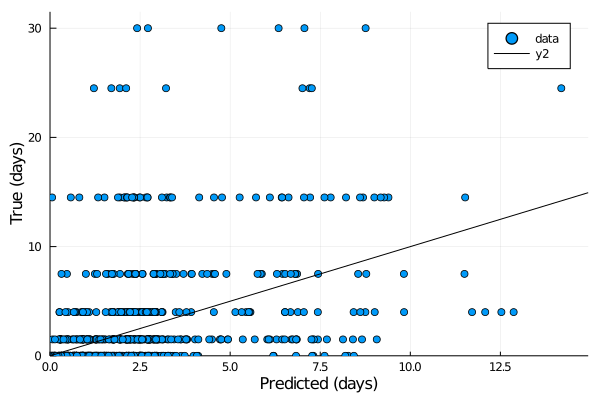

In [923]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [924]:
Xtrain = hcat(q32(train_x1[:q35]), Xtrain)
Xval = hcat(q32(val_x1[:q35]), Xval)

39928×24 Array{Float64,2}:
 0.0  0.0  0.0  100.0  0.0   0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  100.0  0.0   0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0  1.0  100.0  0.0   0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  100.0  8.0   7.5  1.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  100.0  0.0   0.0  1.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  0.0  1.0  100.0  0.0   0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  100.0  0.0   0.0  1.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  100.0  0.5   1.5  1.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  0.0  0.0  100.0  0.0   7.5  1.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0  0.0  100.0  0.0   0.0  1.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  100.0  0.0   0.0  1.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  100.0  0.0   0.0  1.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  100.0  0.0   0.0  0.0     0.0  0.0  1.0  2005.0  17.0  1.

In [925]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

17.667548429577327

Train MSE	17.161347118436808
Validation MSE 	17.667548429577327


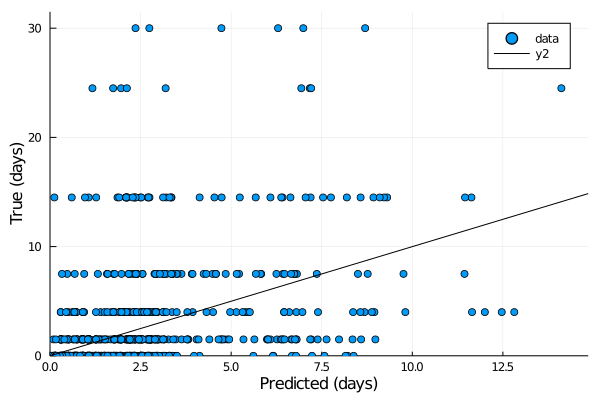

In [926]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [927]:
Xtrain = hcat(q32(train_x1[:q37]), Xtrain)
Xval = hcat(q32(val_x1[:q37]), Xval)

39928×25 Array{Float64,2}:
 0.0  0.0  0.0  0.0  100.0  0.0   0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  100.0  0.0   0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0  0.0  1.0  100.0  0.0   0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  0.0  100.0  8.0   7.5     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  100.0  0.0   0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  0.0  0.0  1.0  100.0  0.0   0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  0.0  100.0  0.0   0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  0.0  100.0  0.5   1.5     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  0.0  0.0  0.0  100.0  0.0   7.5     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0  0.0  0.0  100.0  0.0   0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  100.0  0.0   0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  0.0  100.0  0.0   0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  100.0  0.0   0.0     0.0  0.0  1.0  2005.0  17.0  1.

In [928]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

17.53807861385576

Train MSE	17.111733013513973
Validation MSE 	17.53807861385576


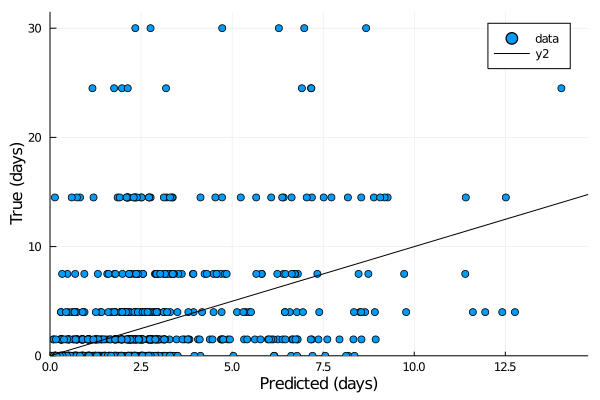

In [929]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [930]:
Xtrain = hcat(q32(train_x1[:q38]), Xtrain)
Xval = hcat(q32(val_x1[:q38]), Xval)

39928×26 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  100.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  100.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0  0.0  0.0  1.0  100.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  100.0  8.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  100.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  0.0  0.0  0.0  1.0  100.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0  100.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  0.0  0.0  100.0  0.5     0.0  1.0  0.0  1997.0  17.0  1.0
 1.5  0.0  0.0  0.0  0.0  100.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  100.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 1.5  0.0  0.0  0.0  0.0  100.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  100.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  100.0  0.0     0.0  0.0  1.0  2005.0  17.0  1.0
 ⋮         

In [931]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

16.828822343257027

Train MSE	16.215607488068933
Validation MSE 	16.828822343257027


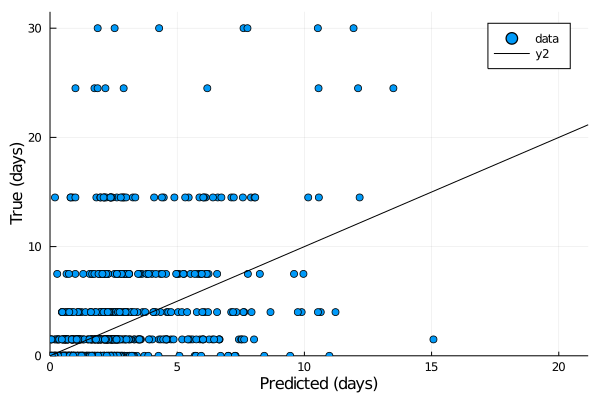

In [932]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [933]:
Xtrain = hcat(onehot(train_x1[:q39], ["1", "2", "3"]), Xtrain)
Xval = hcat(onehot(val_x1[:q39], ["1", "2", "3"]), Xval)

39928×29 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  0.0  0.0  1.5  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  1.5  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  

In [934]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

16.827745693971945

Train MSE	16.21484319756434
Validation MSE 	16.827745693971945


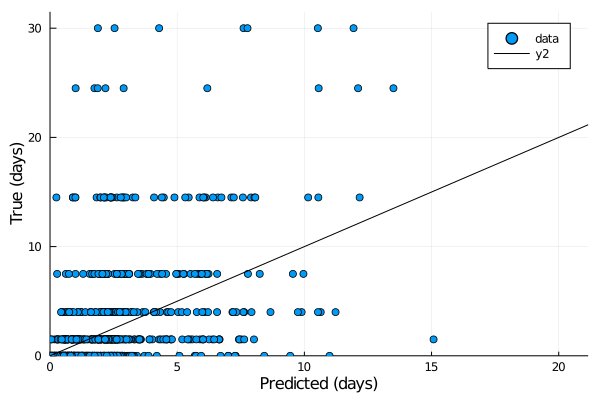

In [935]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [936]:
function q45(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "6"
        elseif df[i] == "4"
            df[i] = "14.5"
        elseif df[i] == "5"
            df[i] = "29.5"
        elseif df[i] == "6"
            df[i] = "69.5"           
        elseif df[i] == "7"
            df[i] = "100"
        end
    end
    df = string_to_float.(df)
    return df
end

q45 (generic function with 1 method)

In [937]:
Xtrain = hcat(q45(train_x1[:q45]), Xtrain)
Xval = hcat(q45(val_x1[:q45]), Xval)

39928×30 Array{Float64,2}:
   0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
   1.5  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
   0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
  69.5  0.0  0.0  0.0  1.5  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
  69.5  0.0  0.0  0.0  1.5  0.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
   0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  17.0  1.0
   ⋮       

In [938]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

16.04510545075332

Train MSE	15.611657963887303
Validation MSE 	16.04510545075332


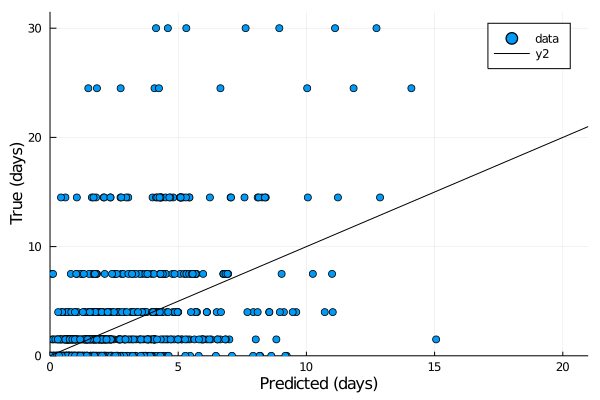

In [939]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [940]:
Xtrain = hcat(q31(train_x1[:q46]), Xtrain)
Xval = hcat(q31(val_x1[:q46]), Xval)

39928×31 Array{Float64,2}:
 100.0    0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 100.0    0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 100.0    0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 100.0    0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
  13.5    1.5  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 100.0    0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 100.0    0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 100.0    0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
  13.5   69.5  0.0  0.0  0.0  1.5  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 100.0    0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
  13.5   69.5  0.0  0.0  0.0  1.5  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 100.0    0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 100.0    0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  200

In [941]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

15.961400285304645

Train MSE	15.526831031615638
Validation MSE 	15.961400285304645


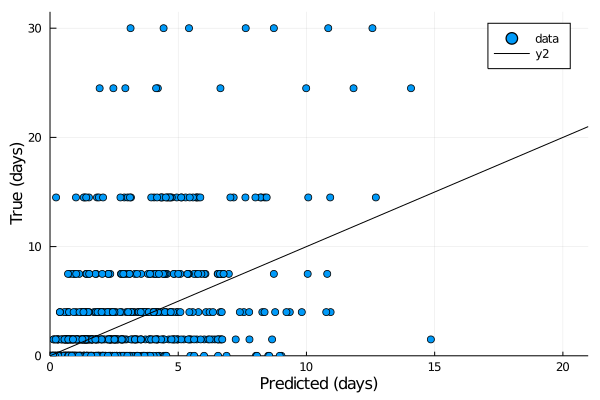

In [942]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [943]:
function q47(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "6"
        elseif df[i] == "4"
            df[i] = "14.5"
        elseif df[i] == "5"
            df[i] = "29.5"
        elseif df[i] == "6"
            df[i] = "40"
        end
    end
    df = string_to_float.(df)
    return df
end

q47 (generic function with 1 method)

In [944]:
Xtrain = hcat(q47(train_x1[:q47]), Xtrain)
Xval = hcat(q47(val_x1[:q47]), Xval)

39928×32 Array{Float64,2}:
  0.0  100.0    0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
  0.0  100.0    0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
  0.0  100.0    0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
  0.0  100.0    0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
  0.0   13.5    1.5  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
  0.0  100.0    0.0  1.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
  0.0  100.0    0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
  0.0  100.0    0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 14.5   13.5   69.5  0.0  0.0  0.0  1.5     0.0  0.0  1.0  2005.0  15.0  1.0
  0.0  100.0    0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
  0.0   13.5   69.5  0.0  0.0  0.0  1.5  …  0.0  0.0  1.0  2011.0  18.0  1.0
  0.0  100.0    0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
  0.0  100.0    0.0  0.0  0.0  0.0  0.0     0.0  

In [945]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

15.657992535107784

Train MSE	15.24586363676406
Validation MSE 	15.657992535107784


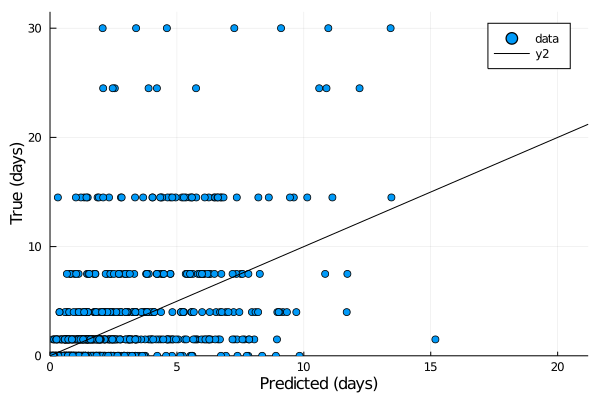

In [946]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [947]:
Xtrain = hcat(q47(train_x1[:q48]), Xtrain)
Xval = hcat(q47(val_x1[:q48]), Xval)

39928×33 Array{Float64,2}:
 0.0   0.0  100.0    0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0   0.0  100.0    0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0   0.0  100.0    0.0  0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0   0.0  100.0    0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0   0.0   13.5    1.5  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0   0.0  100.0    0.0  1.0  0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0   0.0  100.0    0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0   0.0  100.0    0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  14.5   13.5   69.5  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0   0.0  100.0    0.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0   0.0   13.5   69.5  0.0  0.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0   0.0  100.0    0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0   0.0  100.0    0.0  0.0  0.0  0.0     0.0  

In [948]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

15.651848020542648

Train MSE	15.244406621877042
Validation MSE 	15.651848020542648


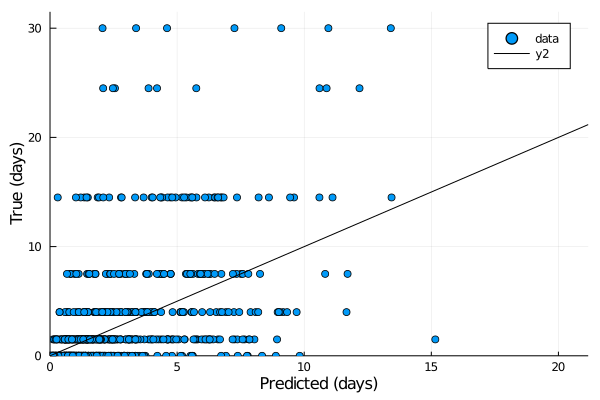

In [949]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [950]:
Xtrain = hcat(q47(train_x1[:q49]), Xtrain)
Xval = hcat(q47(val_x1[:q49]), Xval)

39928×34 Array{Float64,2}:
 0.0  0.0   0.0  100.0    0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0   0.0  100.0    0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0   0.0  100.0    0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0   0.0  100.0    0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0   0.0   13.5    1.5  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  0.0   0.0  100.0    0.0  1.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0   0.0  100.0    0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0   0.0  100.0    0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  0.0  14.5   13.5   69.5  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0   0.0  100.0    0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0   0.0   13.5   69.5  0.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0   0.0  100.0    0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0   0.0  100.0    0.0  0.0  0.0     0.0  

In [951]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

15.647481545665325

Train MSE	15.24347962572099
Validation MSE 	15.647481545665325


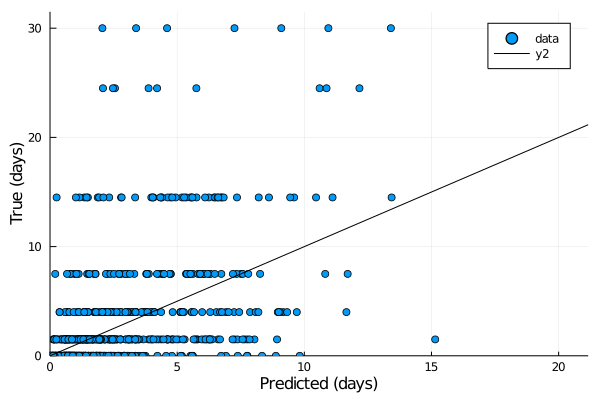

In [952]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [953]:
Xtrain = hcat(q47(train_x1[:q50]), Xtrain)
Xval = hcat(q47(val_x1[:q50]), Xval)

39928×35 Array{Float64,2}:
 0.0  0.0  0.0   0.0  100.0    0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0   0.0  100.0    0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0  0.0   0.0  100.0    0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0   0.0  100.0    0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0   0.0   13.5    1.5  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  0.0  0.0   0.0  100.0    0.0  1.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0   0.0  100.0    0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0   0.0  100.0    0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 1.5  0.0  0.0  14.5   13.5   69.5  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0  0.0   0.0  100.0    0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0   0.0   13.5   69.5  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0   0.0  100.0    0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0   0.0  100.0    0.0  0.0     0.0  

In [954]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

15.284321396691773

Train MSE	14.797976659057941
Validation MSE 	15.284321396691773


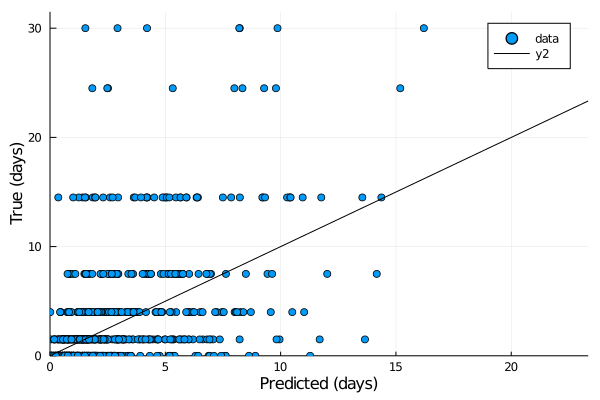

In [955]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [956]:
Xtrain = hcat(q47(train_x1[:q51]), Xtrain)
Xval = hcat(q47(val_x1[:q51]), Xval)

39928×36 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  100.0    0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0   0.0  100.0    0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0  0.0  0.0   0.0  100.0    0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  0.0   0.0  100.0    0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0   0.0   13.5    1.5     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  0.0  0.0  0.0   0.0  100.0    0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  0.0   0.0  100.0    0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  0.0   0.0  100.0    0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 1.5  1.5  0.0  0.0  14.5   13.5   69.5     0.0  0.0  1.0  2005.0  15.0  1.0
 1.5  0.0  0.0  0.0   0.0  100.0    0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0   0.0   13.5   69.5  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  0.0   0.0  100.0    0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0   0.0  100.0    0.0     0.0  

In [957]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

15.205663587307734

Train MSE	14.745785583945873
Validation MSE 	15.205663587307734


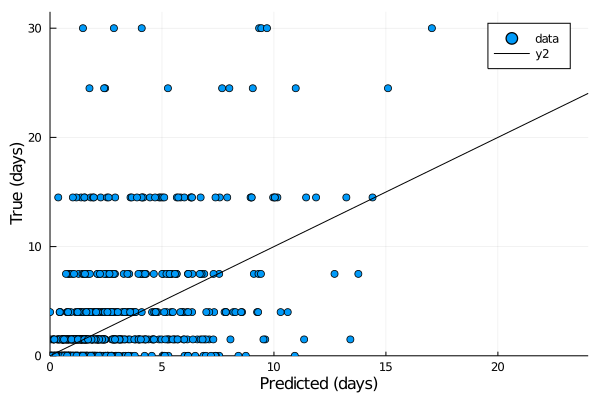

In [958]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [959]:
Xtrain = hcat(q47(train_x1[:q52]), Xtrain)
Xval = hcat(q47(val_x1[:q52]), Xval)

39928×37 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0   0.0  100.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0  100.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0  100.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0  100.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0   13.5     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0  100.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0  100.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0  100.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  1.5  1.5  0.0  0.0  14.5   13.5     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  1.5  0.0  0.0  0.0   0.0  100.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0   13.5  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0  100.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0  100.0     0.0  0.0  1.0  2005.0  17.0  1.

In [960]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

15.068723097211155

Train MSE	14.604010498247495
Validation MSE 	15.068723097211155


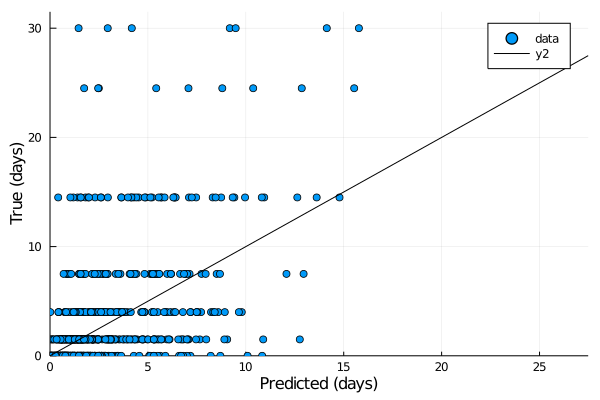

In [961]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [962]:
Xtrain = hcat(q47(train_x1[:q54]), Xtrain)
Xval = hcat(q47(val_x1[:q54]), Xval)

39928×38 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0   0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  0.0  1.5  1.5  0.0  0.0  14.5     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0  1.5  0.0  0.0  0.0   0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  2005.0  17.0  1.0
 ⋮                      

In [963]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

15.0364162064834

Train MSE	14.586806020411387
Validation MSE 	15.0364162064834


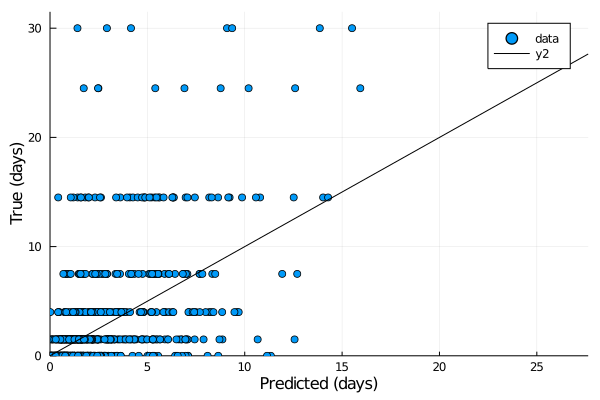

In [964]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [965]:
Xtrain = hcat(q47(train_x1[:q55]), Xtrain)
Xval = hcat(q47(val_x1[:q55]), Xval)

39928×39 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  0.0  0.0  1.5  1.5  0.0  0.0  14.5     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  0.0  0.0  1.5  0.0  0.0  0.0   0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0   

In [966]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

14.899821492491279

Train MSE	14.428113116114513
Validation MSE 	14.899821492491279


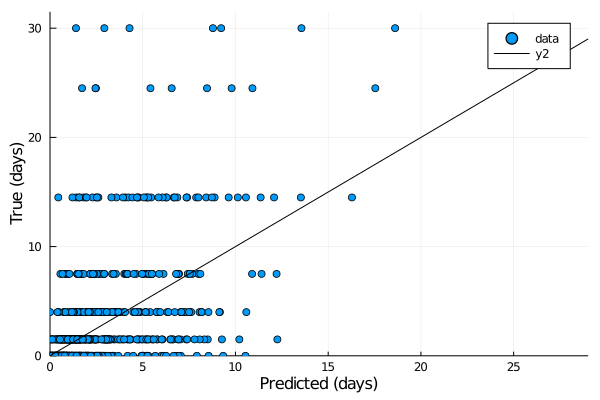

In [967]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [968]:
Xtrain = hcat(onehot(train_x1[:q58], ["1", "2"]), Xtrain)
Xval = hcat(onehot(val_x1[:q58], ["1", "2"]), Xval)

39928×41 Array{Float64,2}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 1.0  0.0  0.0  0.0  0.0  1.5  1.5  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  1.0  0.0  0.0  0.0  1.5  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  

In [969]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

14.796018785012393

Train MSE	14.341458259610306
Validation MSE 	14.796018785012393


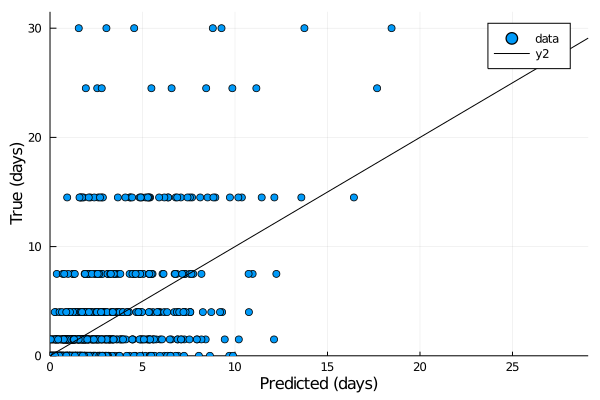

In [970]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [971]:
function q71(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1.5"
        elseif df[i] == "3"
            df[i] = "5"
        elseif df[i] == "4"
            df[i] = "7"
        elseif df[i] == "5"
            df[i] = "14"
        elseif df[i] == "6"
            df[i] = "21"           
        elseif df[i] == "7"
            df[i] = "28"
        end
    end
    df = string_to_float.(df)
    return df
end

q71 (generic function with 1 method)

In [972]:
Xtrain = hcat(q71(train_x1[:q71]), Xtrain)
Xval = hcat(q71(val_x1[:q71]), Xval)

39928×42 Array{Float64,2}:
  1.5  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 28.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
  1.5  1.0  0.0  0.0  0.0  0.0  1.5  1.5     0.0  0.0  1.0  2005.0  15.0  1.0
  1.5  0.0  1.0  0.0  0.0  0.0  1.5  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 28.0  0.0  1.0  0.0  0.0  0.0  0.0  

In [973]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

14.769652366583871

Train MSE	14.318095948680199
Validation MSE 	14.769652366583871


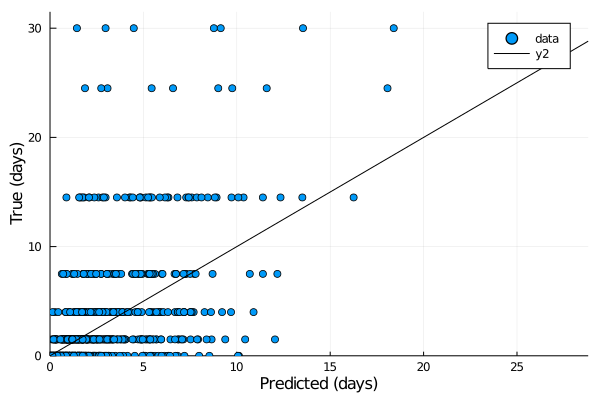

In [974]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [975]:
Xtrain = hcat(q71(train_x1[:q75]), Xtrain)
Xval = hcat(q71(val_x1[:q75]), Xval)

39928×43 Array{Float64,2}:
  0.0   1.5  0.0  1.0  0.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
  1.5   0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 28.0  28.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
  0.0   0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
  0.0   0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
  0.0   0.0  0.0  1.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
  0.0   0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
  0.0   0.0  1.0  0.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
  0.0   1.5  1.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
  0.0   1.5  0.0  1.0  0.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 14.0   0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
  0.0   0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
  0.0  28.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  17.0  1.0
  ⋮        

In [976]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

14.76719716389739

Train MSE	14.314292372732602
Validation MSE 	14.76719716389739


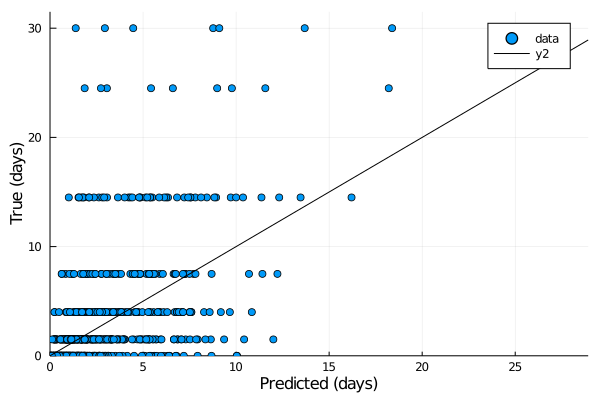

In [977]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [978]:
function q77(df)
    for i = 1:size(df,1)
        if df[i] == "1" || df[i] == " "
            df[i] = "0"
        elseif df[i] == "2"
            df[i] = "1"
        elseif df[i] == "3"
            df[i] = "2"
        elseif df[i] == "4"
            df[i] = "3"
        elseif df[i] == "5"
            df[i] = "4"
        elseif df[i] == "6"
            df[i] = "5"           
        elseif df[i] == "7"
            df[i] = "6"
        elseif df[i] == "8"
            df[i] = "7"
        end
    end
    df = string_to_float.(df)
    return df
end

q77 (generic function with 1 method)

In [979]:
Xtrain = hcat(q77(train_x1[:q77]), Xtrain)
Xval = hcat(q77(val_x1[:q77]), Xval)

39928×44 Array{Float64,2}:
 0.0   0.0   1.5  0.0  1.0  0.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0   1.5   0.0  0.0  1.0  0.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 4.0  28.0  28.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0   0.0   0.0  0.0  1.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0   0.0   0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 6.0   0.0   0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0   0.0   0.0  1.0  0.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0   0.0   0.0  1.0  0.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0   0.0   1.5  1.0  0.0  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0   0.0   1.5  0.0  1.0  0.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 2.0  14.0   0.0  1.0  0.0  0.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0   0.0   0.0  0.0  1.0  0.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0   0.0  28.0  0.0  1.0  0.0  0.0     0.0  0.0  1.0  2005.0  17.0  1.0
 ⋮         

In [980]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

14.766949460183575

Train MSE	14.314069873389808
Validation MSE 	14.766949460183575


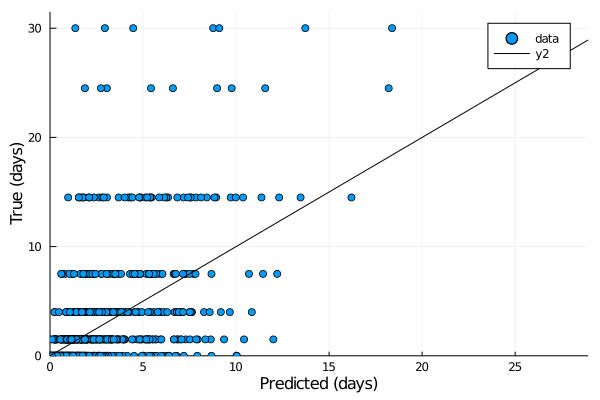

In [981]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [982]:
function q88(df)
    for i = 1:size(df,1)
        if df[i] == "1"
            df[i] = "4"
        elseif df[i] == "2"
            df[i] = "5"
        elseif df[i] == "3"
            df[i] = "6"
        elseif df[i] == "4" || df[i] == " "
            df[i] = "7"
        elseif df[i] == "5"
            df[i] = "8"
        elseif df[i] == "6"
            df[i] = "9"           
        elseif df[i] == "7"
            df[i] = "10"
        end
    end
    df = string_to_float.(df)
    return df
end

q88 (generic function with 1 method)

In [983]:
Xtrain = hcat(q88(train_x1[:q88]), Xtrain)
Xval = hcat(q88(val_x1[:q88]), Xval)

39928×45 Array{Float64,2}:
 7.0  0.0   0.0   1.5  0.0  1.0  0.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 8.0  0.0   1.5   0.0  0.0  1.0  0.0     0.0  0.0  1.0  2007.0  16.0  1.0
 6.0  4.0  28.0  28.0  1.0  0.0  0.0     0.0  0.0  1.0  2015.0  15.0  1.0
 7.0  0.0   0.0   0.0  0.0  1.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 7.0  0.0   0.0   0.0  1.0  0.0  0.0     0.0  0.0  1.0  1993.0  18.0  1.0
 6.0  6.0   0.0   0.0  0.0  1.0  0.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 7.0  0.0   0.0   0.0  1.0  0.0  0.0     0.0  0.0  1.0  1993.0  14.0  1.0
 7.0  0.0   0.0   0.0  1.0  0.0  0.0     0.0  1.0  0.0  1997.0  17.0  1.0
 7.0  0.0   0.0   1.5  1.0  0.0  0.0     0.0  0.0  1.0  2005.0  15.0  1.0
 7.0  0.0   0.0   1.5  0.0  1.0  0.0     0.0  1.0  0.0  2003.0  16.0  1.0
 6.0  2.0  14.0   0.0  1.0  0.0  0.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 7.0  0.0   0.0   0.0  0.0  1.0  0.0     0.0  0.0  1.0  1991.0  16.0  1.0
 7.0  0.0   0.0  28.0  0.0  1.0  0.0     0.0  0.0  1.0  2005.0  17.0  1.0
 ⋮         

In [984]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

14.762227569959354

Train MSE	14.311246801307563
Validation MSE 	14.762227569959354


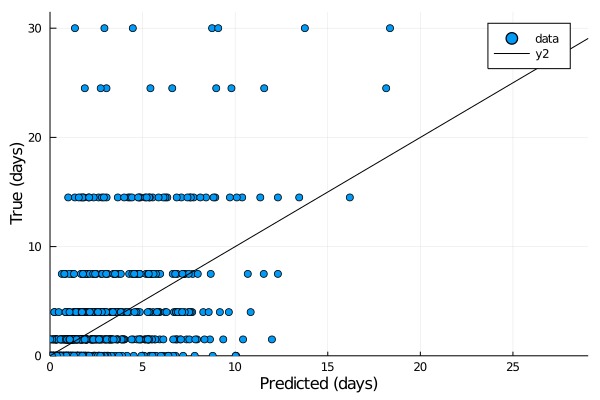

In [985]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

In [986]:
Xtrain = hcat(onehot(train_x1[:q89], ["1", "2", "3", "4", "5", "6", "7"]), Xtrain)
Xval = hcat(onehot(val_x1[:q89], ["1", "2", "3", "4", "5", "6", "7"]), Xval)

39928×52 Array{Float64,2}:
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  7.0  …  0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  8.0     0.0  0.0  1.0  2007.0  16.0  1.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  6.0     0.0  0.0  1.0  2015.0  15.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  7.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  7.0     0.0  0.0  1.0  1993.0  18.0  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  …  0.0  0.0  1.0  2017.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  7.0     0.0  0.0  1.0  1993.0  14.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  7.0     0.0  1.0  0.0  1997.0  17.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  7.0     0.0  0.0  1.0  2005.0  15.0  1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  7.0     0.0  1.0  0.0  2003.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  6.0  …  0.0  0.0  1.0  2011.0  18.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  7.0     0.0  0.0  1.0  1991.0  16.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  7.0     0.0  

In [987]:
w = Xtrain \ train_y1
train_pred = (w'*Xtrain')'
val_pred = (w'*Xval')'


train_MSE = MSE(train_pred, train_y1)
val_MSE = MSE(val_pred, val_y1)

14.761075697927259

Train MSE	14.307468281798595
Validation MSE 	14.761075697927259


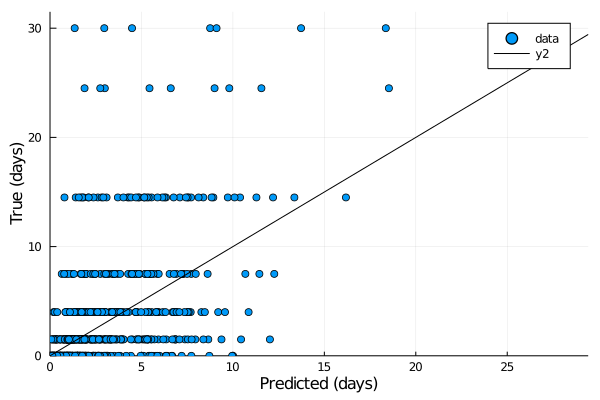

In [988]:
println("Train MSE\t", train_MSE)
println("Validation MSE \t", val_MSE)

plot_pred_true(val_pred, val_y1)

Things that didn't help: q25 (depression), sexid, q53 (meth), q68 (trying to gain or lose weight), q79 (TV)